Selección de hyperparámetros y selección de características

C:\Users\cris2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:110: UserWarning: Features [20 21] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\cris2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\feature_selection\_univariate_selection.py:111: RuntimeWarning: invalid value encountered in divide
  f = msb / msw
C:\Users\cris2\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_split.py:811: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Mejores parámetros: {'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}
Accuracy en test: 1.000
Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      1.00      1.00         8

    accuracy                           1.00       118
   macro avg       1.00      1.00      1.00       118
weighted avg       1.00      1.00      1.00       118



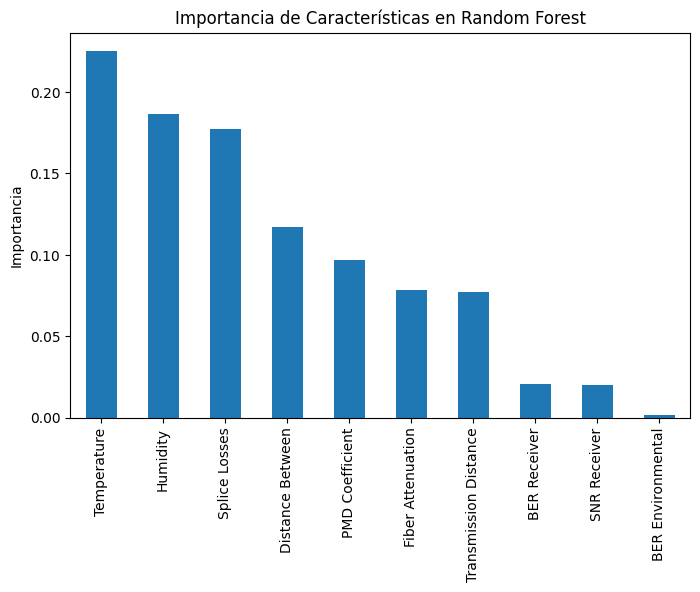

In [1]:
# ==============================================
# Selección de hiperparámetros y características con RandomForest
# ==============================================

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# 1. Cargar dataset
df = pd.read_csv("ocrdataset.csv")

# 2. Separar características (X) y etiquetas (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# 3. Codificar variables categóricas
X = pd.get_dummies(X).fillna(0)

# 4. Codificar etiquetas si son categóricas
if y.dtype == "object":
    le = LabelEncoder()
    y = le.fit_transform(y)

# 5. Dividir en train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# =================================================
# SELECCIÓN DE CARACTERÍSTICAS (ejemplo con SelectKBest)
# =================================================
selector = SelectKBest(score_func=f_classif, k=10)  # Selecciona las 10 mejores
X_train_sel = selector.fit_transform(X_train, y_train)
X_test_sel = selector.transform(X_test)

# =================================================
# RANDOM FOREST + GRIDSEARCH PARA HIPERPARÁMETROS
# =================================================
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10, 20],
    "max_features": ["sqrt", "log2"],
    "criterion": ["gini", "entropy"]
}

rf = RandomForestClassifier(random_state=42)

grid = GridSearchCV(rf, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train_sel, y_train)

best_model = grid.best_estimator_
y_pred = best_model.predict(X_test_sel)

# =================================================
# RESULTADOS
# =================================================
print("Mejores parámetros:", grid.best_params_)
print(f"Accuracy en test: {accuracy_score(y_test, y_pred):.3f}")
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# =================================================
# IMPORTANCIA DE CARACTERÍSTICAS
# =================================================
importances = best_model.feature_importances_
feature_names = X.columns[selector.get_support()]  # nombres seleccionados por SelectKBest

feat_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(8,5))
feat_importances.plot(kind="bar")
plt.title("Importancia de Características en Random Forest")
plt.ylabel("Importancia")
plt.show()
